# Análisis Descriptivo y Exploratorio (EDA)
## Objetivos iniciales

1. **Describir la Población de Estudio**:
    - Edad, género y distribución geográfica de los pacientes.
    - Tipos de seguros predominantes.
2. **Describir los Valores de Hemoglobina**:
    - Distribución de los valores de hemoglobina al momento del diagnóstico.
    - Evolución de los valores de hemoglobina en los distintos seguimientos.

## Limpieza de datos
Instlacion de librerias para la manipulacion y visualizacion de datos

In [512]:
pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\CARLOS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# luego sklearn para la regresion lineal

### Carga del Dataset

In [514]:
# se agrego sep=';' dado que el campo seguro de salud tiene comas y genera comportamientos inesperados

df = pd.read_csv('../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín.csv', encoding='unicode_escape', sep=';') 
df[df.columns[4:20]].head(10)

n_original = df.shape[0]

## Depturacion de datos
1. Corregir data incosistente
5. Eliminar duplicados
1. Manejar missing values
3. Identificar outliers


  

### 1. Corregir formatos

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_doc                 12486 non-null  float64
 1   seguro                  12486 non-null  object 
 2   fecha_nac               12486 non-null  object 
 3   fecha_dx                12486 non-null  object 
 4   valor_lab_dx            12281 non-null  object 
 5   fecha_dosaje_dx         11567 non-null  object 
 6   hb_dx                   10577 non-null  float64
 7   fecha_dosaje_mes        8379 non-null   object 
 8   hb                      7585 non-null   float64
 9   fecha_dosaje_3_meses    6836 non-null   object 
 10  hb_tresmeses            6174 non-null   float64
 11  fecha_dosaje_6_meses    5783 non-null   object 
 12  hb_seismeses            5378 non-null   float64
 13  fecha_recup             5859 non-null   object 
 14  recup                   12486 non-null

In [516]:
col_date = [
    'fecha_nac', 'fecha_dx', 'fecha_dosaje_3_meses', 'fecha_dosaje_6_meses',
    'fecha_dosaje_dx', 'fecha_recup', 'fecha_supT1', 'fecha_supT2',
    'fecha_supT3', 'fecha_supT4', 'fecha_supT5', 'fecha_supT6', 'fecha_ta', 'fecha_dosaje_mes'
]
for col in col_date:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True) 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   num_doc                 12486 non-null  float64       
 1   seguro                  12486 non-null  object        
 2   fecha_nac               12486 non-null  datetime64[ns]
 3   fecha_dx                12486 non-null  datetime64[ns]
 4   valor_lab_dx            12281 non-null  object        
 5   fecha_dosaje_dx         11567 non-null  datetime64[ns]
 6   hb_dx                   10577 non-null  float64       
 7   fecha_dosaje_mes        8379 non-null   datetime64[ns]
 8   hb                      7585 non-null   float64       
 9   fecha_dosaje_3_meses    6836 non-null   datetime64[ns]
 10  hb_tresmeses            6174 non-null   float64       
 11  fecha_dosaje_6_meses    5783 non-null   datetime64[ns]
 12  hb_seismeses            5378 non-null   float6

### 2. Datos Faltantes

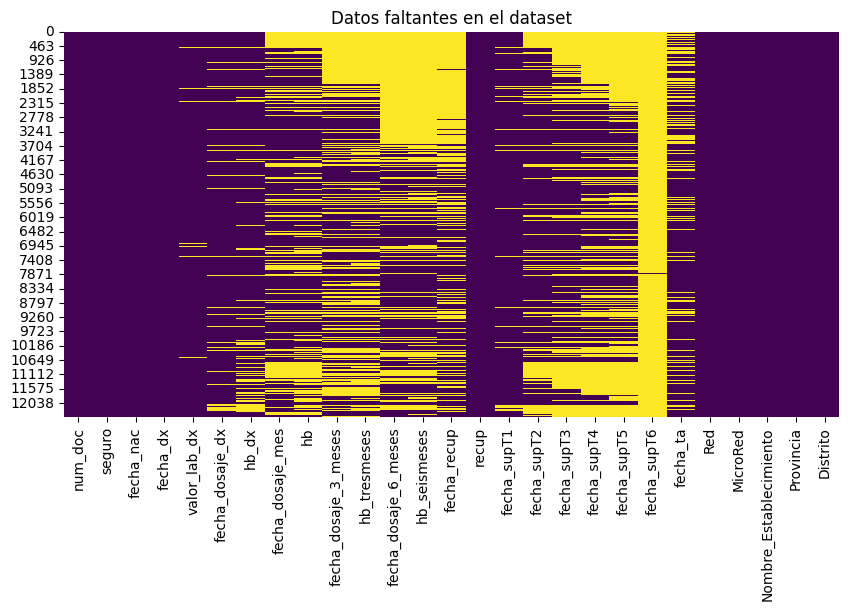

num_doc                       0
seguro                        0
fecha_nac                     0
fecha_dx                      0
valor_lab_dx                205
fecha_dosaje_dx             919
hb_dx                      1909
fecha_dosaje_mes           4107
hb                         4901
fecha_dosaje_3_meses       5650
hb_tresmeses               6312
fecha_dosaje_6_meses       6703
hb_seismeses               7108
fecha_recup                6627
recup                         0
fecha_supT1                 981
fecha_supT2                3322
fecha_supT3                4942
fecha_supT4                6297
fecha_supT5                7371
fecha_supT6               12455
fecha_ta                   3156
Red                           0
MicroRed                      0
Nombre_Establecimiento        0
Provincia                     0
Distrito                      0
dtype: int64


In [517]:
# graficar los datos faltantes
import matplotlib.pyplot as plt
import seaborn as sns

def show_missing_data(df):
    plt.figure(figsize=(10,5))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Datos faltantes en el dataset')
    plt.show()

show_missing_data(df)
print(df.isnull().sum())

### Observaciones
1. Todos cuentan con id, seguros, fecha de nacimiento y del diagnostico (dx). Un inidicador de recuperacion y datos geograficos,
2. MV en el diagnostico inicial (valor_lab), la fecha del dosaje dx y el resultado correspondiente.
3. MV en los tratamientos y suplementaciones, asi como en sus fechas. Estos parecen indicar la no asistencia a los eventos.



### Acciones
1. Eliminar duplicados integros e ids repetidos. Mostrar la distribucion geografica del DS segun recuperacion.

2. Tratar los missing values en valor_lab dosaje_dx y su resultado

3. Enriquecer los datos con el numero de dosajes de seguimiento y suplementaciones, de esta manera reduciendo la dimensionalidad


### 1.Eliminacion de datos enteramente duplicados y verificar coincidencias por id

In [518]:
# Eliminar registros duplicados
n = df.shape[0]
df = df.drop_duplicates()
print(f'Se eliminaron {n - df.shape[0]} registros enteramente duplicados')

# coincidencias de dnis
print('Evaluar coincidencias de dnis')
colisiones = df['num_doc'].value_counts()
print(colisiones.head(10))

print('Registros con dnis duplicados')
print(df[df['num_doc'] == colisiones.index[0]])

Se eliminaron 33 registros enteramente duplicados
Evaluar coincidencias de dnis
num_doc
6.723610e+15    24
6.727140e+15    23
6.722890e+15    22
6.722800e+15    21
6.726040e+15    18
6.726830e+15    18
6.717160e+15    18
6.720330e+15    18
6.720990e+15    17
6.717170e+15    17
Name: count, dtype: int64
Registros con dnis duplicados
            num_doc seguro  fecha_nac   fecha_dx valor_lab_dx fecha_dosaje_dx  \
1043   6.723610e+15    1,  2022-04-17 2024-04-17          LEV      2024-04-17   
1161   6.723610e+15    1,  2022-04-05 2024-04-10          MOD      2024-04-10   
2094   6.723610e+15    1,  2022-02-27 2024-03-01          LEV      2024-03-01   
4502   6.723610e+15    1,  2021-11-07 2023-11-07          LEV      2023-11-07   
4864   6.723610e+15    1,  2021-09-22 2023-10-22          LEV      2023-10-22   
5017   6.723610e+15    1,  2021-10-14 2023-10-14          LEV      2023-10-14   
6547   6.723610e+15    1,  2021-07-27 2023-08-01          LEV      2023-08-01   
7131   6.723610e+1

Nacieron en diferentes dias, asi que son diferentes personas.
Consultar mismo id y fecha de nacimiento

Se encontraron 3697 registros con el mismo dni(censurado) y fecha de nacimiento
Se encontraron 485 registros con el mismo dni(censurado), fecha de nacimiento y fecha de diagnostico
La significancia de los registros duplicados es 3.89%


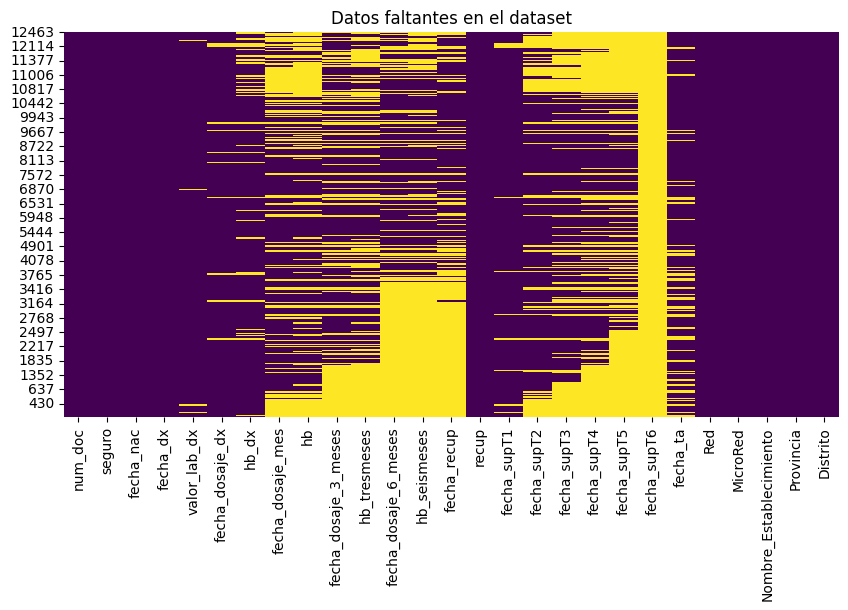

In [519]:
# personas con el mismo id, fecha de nacimiento, fecha diagnostico 

same_person = df[df.duplicated(['num_doc', 'fecha_nac'], keep=False)] # keep=False para marcar todos los duplicados
print(f'Se encontraron {same_person.shape[0]} registros con el mismo dni(censurado) y fecha de nacimiento')

same_in = same_person[same_person.duplicated(['num_doc', 'fecha_nac', 'fecha_dx'], keep=False)]
print(f'Se encontraron {same_in.shape[0]} registros con el mismo dni(censurado), fecha de nacimiento y fecha de diagnostico')
df_sm = same_in.sort_values(['fecha_dx','fecha_nac', 'num_doc'])

print(f'La significancia de los registros duplicados es {df_sm.shape[0]/df.shape[0]:.2%}')
show_missing_data(df_sm)


Al realizar un conusulta por id(censurado) y la fecha de nacimiento obtuvimos casos que parecen reingresos.

Por ello, nos aseguraremos que ademas de ser la misma persona sea el mismo ingreso obtenemos un 4.4% de los datos con este vicio.

Se procede a la limpieza manteniendo el primer registro. En el futuro podriamos pensar en combinar los registros, en lugar de borrarlos

In [520]:
# Eliminar registros duplicados
n = df.shape[0]
df = df.drop_duplicates(['num_doc', 'fecha_nac', 'fecha_dx'], keep='first')
print(f'Se eliminaron {n - df.shape[0]} registros duplicados, significancia {1 - df.shape[0]/n:.2%}')

Se eliminaron 246 registros duplicados, significancia 1.98%


c. Mostrar la distribucion geografica del DS segun recuperacion.

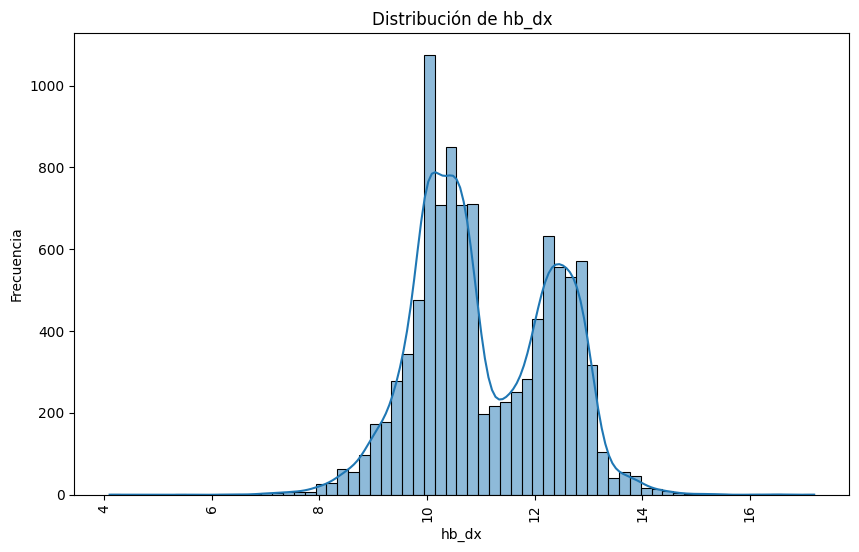

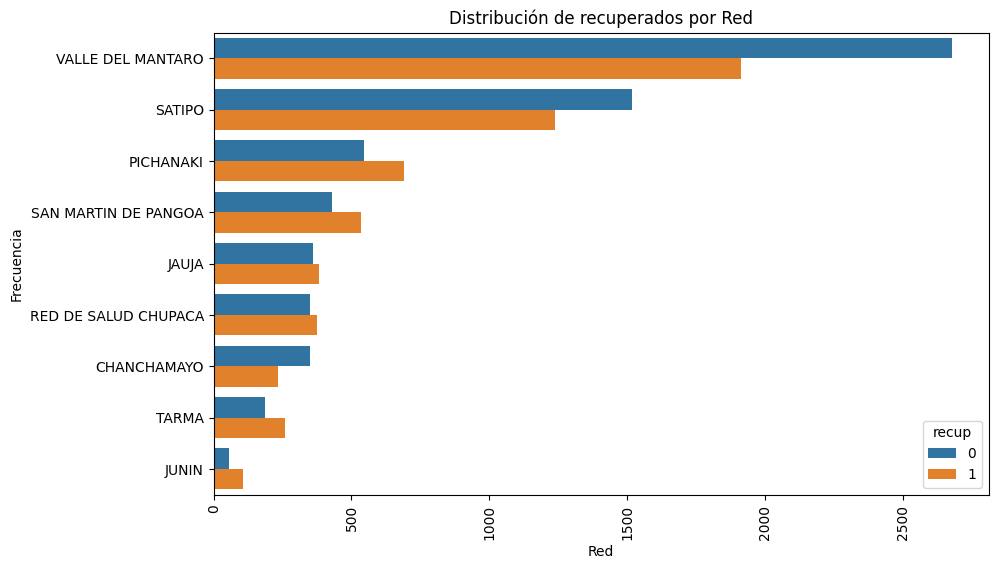

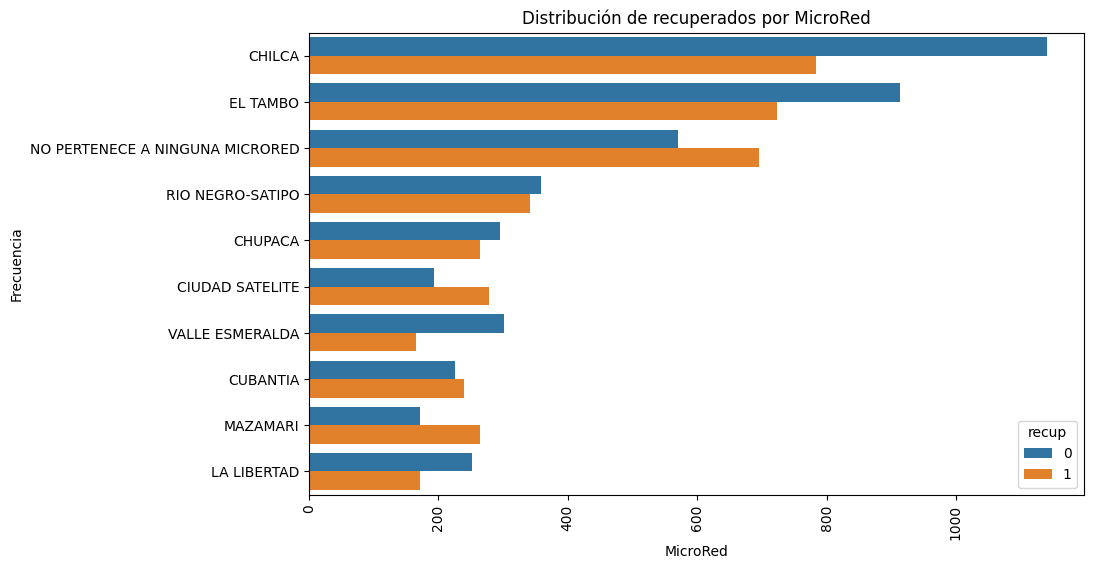

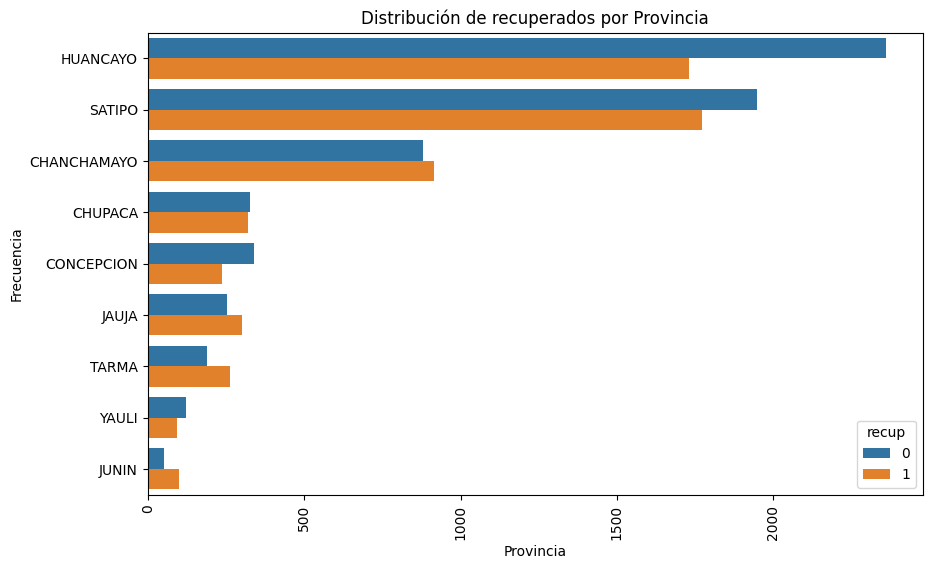

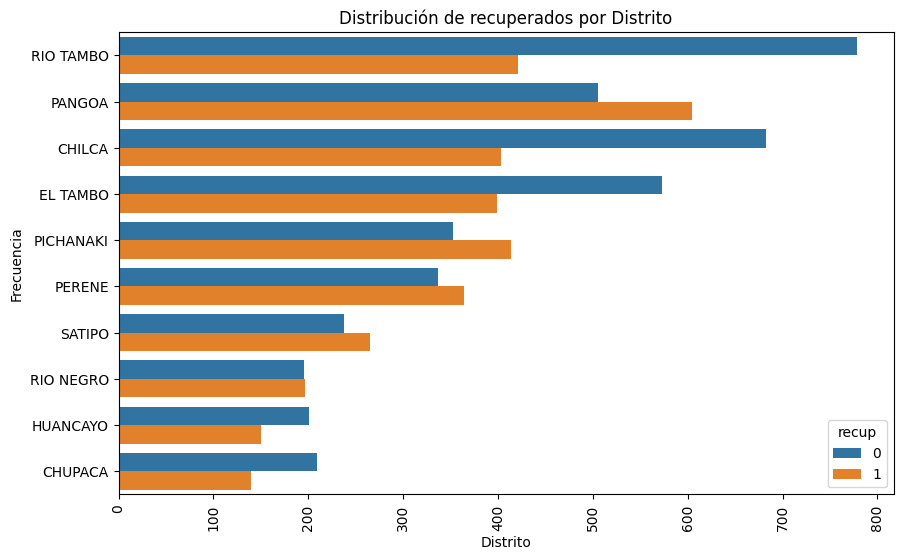

In [521]:
def show_f_histo(col): # mostrar continuas
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Frecuencia')
    plt.show()

def show_top_count(col): # top 10 categoricas
    plt.figure(figsize=(10, 6))
    top_catego = df[col].value_counts().index[:10]
    sns.countplot(y=df[col], order=top_catego)
    plt.title(f'Distribución de recuperados por {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Frecuencia')
    plt.show()

def show_r_top_count(col): # top 10 categoricas
    plt.figure(figsize=(10, 6))
    top_catego = df[col].value_counts().index[:10]
    sns.countplot(y=df[col], order=top_catego, hue=df['recup'])
    plt.title(f'Distribución de recuperados por {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Frecuencia')
    plt.show()

show_f_histo('hb_dx')
show_r_top_count('Red')
show_r_top_count('MicroRed')
show_r_top_count('Provincia')
show_r_top_count('Distrito')





Notamos algunas zonas con predominacia de recuperados, pero la tendendecia parece ser la no recuperacion. (¿Por que?)

### MV en el diagnostico


In [522]:
# valor_lab_dx resultado de la prueba diagnostica
df_sdx = df[df["valor_lab_dx"].isnull()]
# parece que tienen fecha de prueba diagnostica pero no tienen resultado
print(f"{len(df_sdx)} registros sin diagnostico (LEV, MOD, SEV), representan un {len(df_sdx)/len(df)*100:.2f}%") 

# sin fecha de prueba diagnostica
df_spdx = df[df["fecha_dosaje_dx"].isnull()]
print(f"{len(df_spdx)} registros sin fecha de prueba diagnostica, representan un {len(df_spdx)/len(df)*100:.2f}%")
#df_sdx.head(10)

# sin hemoglobina
df_shb = df[df["hb_dx"].isnull()]
print(f"{len(df_shb)} registros sin hemoglobina, representan un {len(df_shb)/len(df)*100:.2f}%")
df_shb.head()

202 registros sin diagnostico (LEV, MOD, SEV), representan un 1.65%
911 registros sin fecha de prueba diagnostica, representan un 7.46%
1880 registros sin hemoglobina, representan un 15.40%


,num_doc,seguro,fecha_nac,fecha_dx,valor_lab_dx,fecha_dosaje_dx,hb_dx,fecha_dosaje_mes,hb,fecha_dosaje_3_meses,...,fecha_supT3,fecha_supT4,fecha_supT5,fecha_supT6,fecha_ta,Red,MicroRed,Nombre_Establecimiento,Provincia,Distrito
7,8.729330e+15,"1,",2023-06-19,2024-06-19,MOD,2024-06-19,NaN,NaT,NaN,NaT,...,NaT,NaT,NaT,NaT,NaT,VALLE DEL MANTARO,CHILCA,SAPALLANGA,HUANCAYO,SAPALLANGA
10,8.771530e+15,"1,",2023-12-19,2024-06-19,MOD,NaT,NaN,NaT,NaN,NaT,...,NaT,NaT,NaT,NaT,2024-06-20,JUNIN,CARHUAMAYO,CARHUAMAYO,JUNIN,CARHUAMAYO
12,8.793640e+15,"1,",2024-03-26,2024-06-19,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaT,NaT,NaT,NaT,VALLE DEL MANTARO,CHILCA,AZAPAMPA,HUANCAYO,CHILCA
13,8.691130e+15,"1,",2023-01-19,2024-06-19,LEV,NaT,NaN,NaT,NaN,NaT,...,NaT,NaT,NaT,NaT,NaT,SAN MARTIN DE PANGOA,NO PERTENECE A NINGUNA MICRORED,SAN MARTIN DE PANGOA,SATIPO,PANGOA
26,8.793990e+15,"1,",2024-03-28,2024-06-17,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaT,NaT,NaT,NaT,VALLE DEL MANTARO,LA LIBERTAD,LA LIBERTAD,HUANCAYO,HUANCAYO


Usaremos la categoria diagnostico para tratar los MV en el dosaje diagnostico. Primero imputaremos ese 1.65%

valor_lab_dx
LEV    8026
MOD    4103
SEV      78
Name: count, dtype: int64


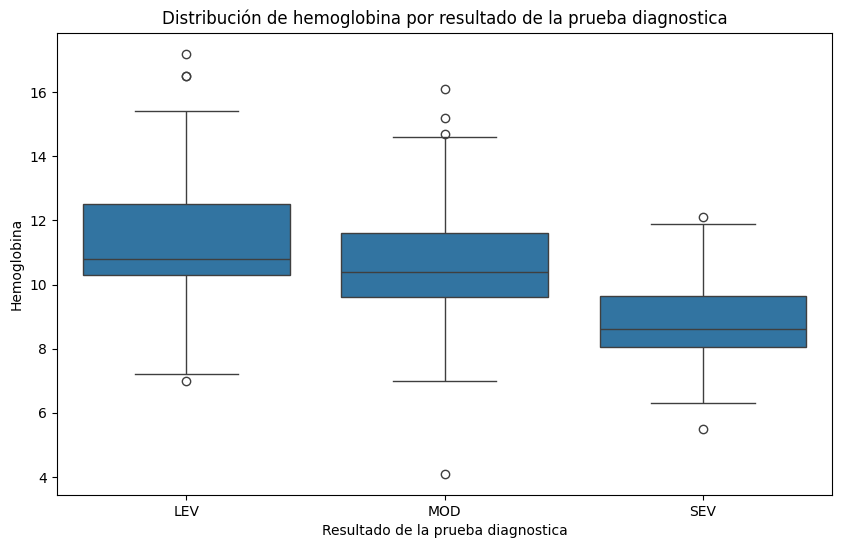

In [523]:
# imputar con moda 
df['valor_lab_dx'] = df['valor_lab_dx'].fillna(df['valor_lab_dx'].mode()[0])

print(df['valor_lab_dx'].value_counts())

# Mostrar los valores de la hemoglobina segun el resultado de la prueba diagnostica
# grafico de cajas

plt.figure(figsize=(10, 6))
sns.boxplot(x='valor_lab_dx', y='hb_dx', data=df, order=['LEV','MOD','SEV']) 
plt.title('Distribución de hemoglobina por resultado de la prueba diagnostica')
plt.xlabel('Resultado de la prueba diagnostica')
plt.ylabel('Hemoglobina')
plt.show()

Dada la presencia de outliders, completaremos los valores faltantes mediante la mediana
**Ahora tenemos que tomar una decision** 
Limpiamos y luego imputamos con mediana o viceversa

Se realizaran ambas y se comparara antes de decidir


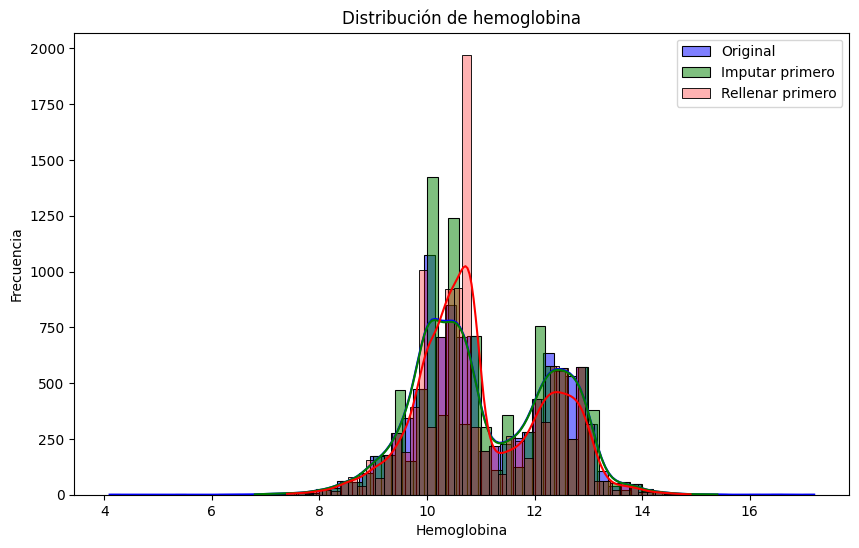

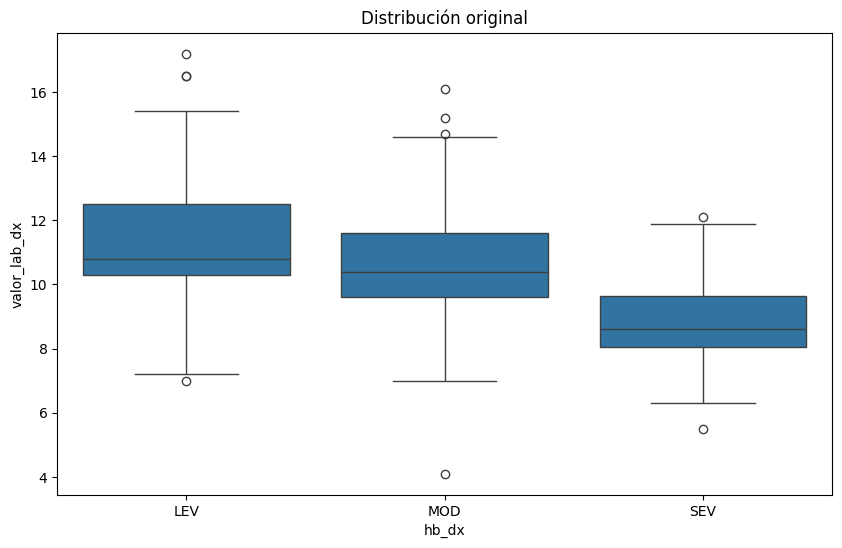

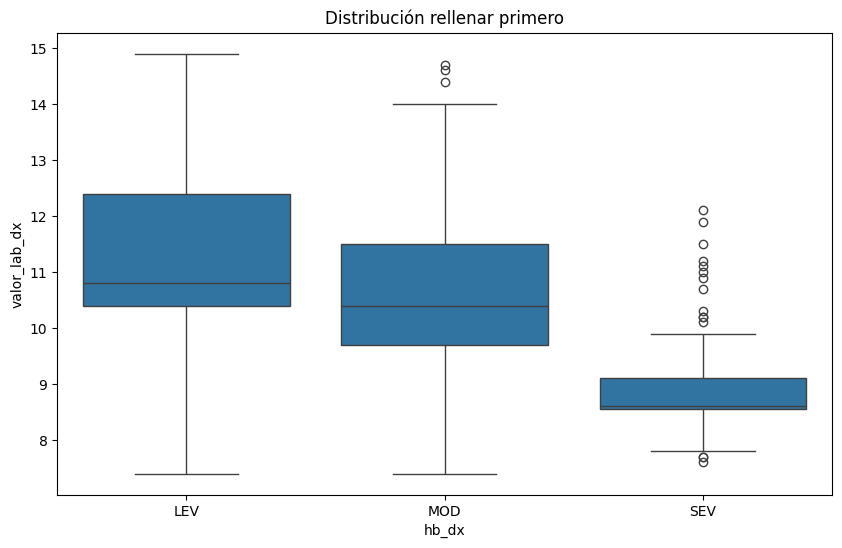

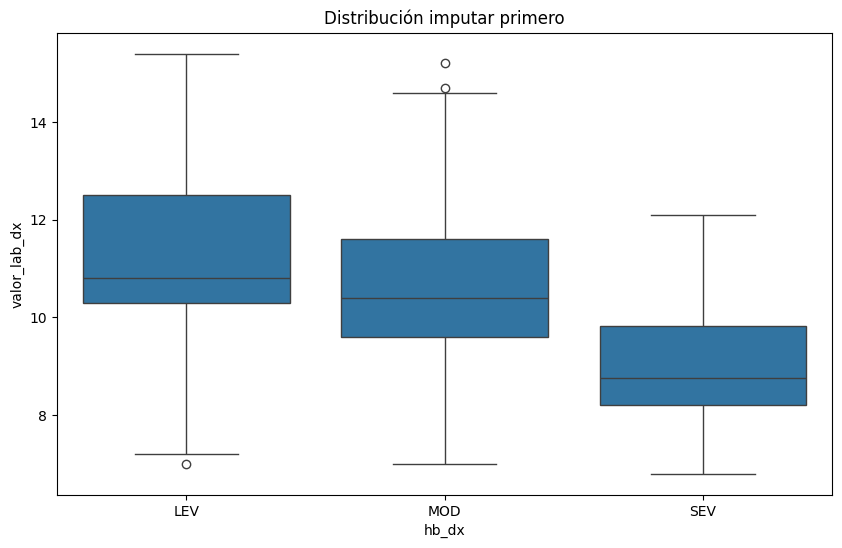

In [524]:
def remove_outliers_IQR(df, column): # fuera del bigote del boxplot
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_fill_first = df.copy()
df_imput_first = df.copy()

# llenar los valores de hemoglobina con la mediana de la prueba diagnostica
df_fill_first['hb_dx'] = df_fill_first.groupby('valor_lab_dx')['hb_dx'].transform(lambda x: x.fillna(x.median()))
df_fill_first = remove_outliers_IQR(df_fill_first, 'hb_dx')

# llenar los valores de hemoglobina con la mediana de la prueba diagnostica
df_imput_first = remove_outliers_IQR(df_imput_first, 'hb_dx')
df_imput_first['hb_dx'] = df_imput_first.groupby('valor_lab_dx')['hb_dx'].transform(lambda x: x.fillna(x.median()))

# comparar los resultados

plt.figure(figsize=(10, 6))
sns.histplot(df['hb_dx'], kde=True, color='blue', label='Original')
sns.histplot(df_imput_first['hb_dx'], kde=True, color='green', label='Imputar primero', alpha=0.5)
sns.histplot(df_fill_first['hb_dx'], kde=True, color='red', label='Rellenar primero', alpha=0.3)
plt.title('Distribución de hemoglobina')
plt.xlabel('Hemoglobina')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

def show_dbp(df, col, met):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='valor_lab_dx', y=col, data=df, order=['LEV','MOD','SEV'])
    plt.title(f'Distribución {met}')
    plt.xlabel(col)
    plt.ylabel('valor_lab_dx')
    plt.show()

show_dbp(df, 'hb_dx', 'original')
show_dbp(df_fill_first, 'hb_dx', 'rellenar primero')
show_dbp(df_imput_first, 'hb_dx', 'imputar primero')


Notamos que imputar primero se muestra mas amigable con las tendencias y en los boxplot. (validar decision) 

In [525]:
df = df_imput_first.copy() # aplicamos la imputacion

La anemia puede entenderse como valores bajos de hemoglobina, hemocrocito o eritrocitos, segun el [Manual MSD.](https://www.msdmanuals.com/es/professional/hematolog%C3%ADa-y-oncolog%C3%ADa/abordaje-del-paciente-con-anemia/evaluaci%C3%B3n-de-la-anemia)

En consecuencia, algunos de los valores atípicos (outliers) podrían no provenir de errores en la recopilación de datos.

Huelga mencionar que el manual pertinente es el que el MINSA provee mediante normativas.


**Como tratar los MV de la fecha de prueba diagnostica 7.5%?**


In [526]:
df_spdx = df[df["fecha_dosaje_dx"].isnull()]
print(f"{len(df_spdx)} registros sin fecha de prueba diagnostica, representan un {len(df_spdx)/len(df)*100:.2f}%")

0 registros sin fecha de prueba diagnostica, representan un 0.00%



Para ello, calcularemos la edad de los infantes al realizar la prueba,
con ello podremos imputar los datos de forma coherente a la fecha de nacimiento y otros registros

**Edad al momento del diagnostico**


In [527]:
df[['fecha_dx', 'fecha_nac']].isnull().sum()

fecha_dx     0
fecha_nac    0
dtype: int64

In [528]:
# EDAD EN MESES AL MOMENTO DEL DIAGNOSTICO
def month_diff(a, b):
    return 12 * (a.dt.year - b.dt.year) + (a.dt.month - b.dt.month) + (a.dt.day - b.dt.day) / 30

# Valores nulos en edad_diagnostico
df['edad_diagnostico'] = month_diff(df['fecha_dx'], df['fecha_nac']) # meses

print(f"Valores nulos en edad_diagnostico: {df['edad_diagnostico'].isnull().sum() / len(df) * 100:.2f}%")
print(f"Edades negativas: {len(df.query('edad_diagnostico < 0'))}")

Valores nulos en edad_diagnostico: 0.00%
Edades negativas: 0


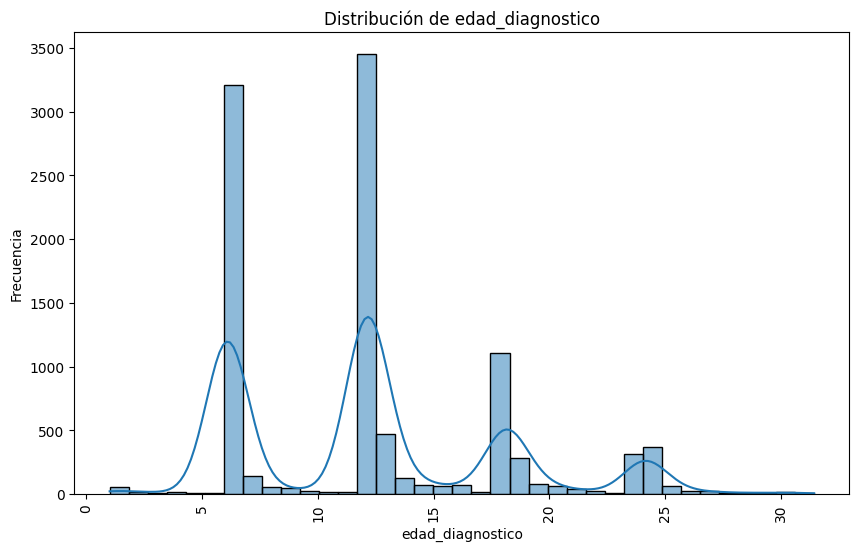

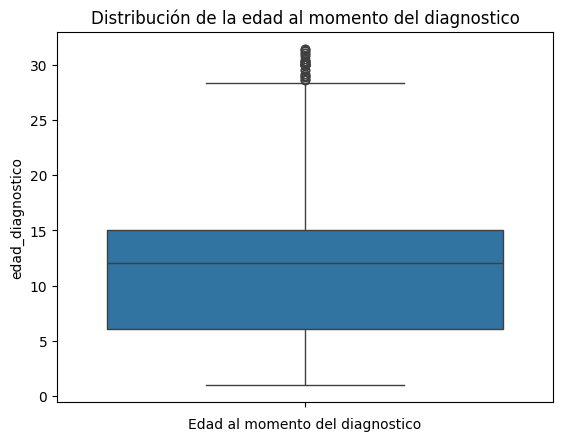

In [529]:
# distribucion de la edad al momento del diagnostico
show_f_histo('edad_diagnostico')
boxplot = sns.boxplot(df['edad_diagnostico'])
plt.title('Distribución de la edad al momento del diagnostico')
plt.xlabel('Edad al momento del diagnostico')
plt.show()

Imputamos con mediana (caso outliders)

In [530]:
# si no hay fecha de dosaje_dx, se imputa sumando la mediana de la edad al momento del diagnostico a la fecha de nacimiento

edad_diagnostico = pd.to_timedelta(df['edad_diagnostico'].median() * 30, 'd')

# Imputar la fecha de dosaje_dx sumando la mediana de la edad en días a la fecha de nacimiento
df['fecha_dosaje_dx'] = df['fecha_dosaje_dx'].fillna(df['fecha_nac'] + edad_diagnostico)

print(f"Valores nulos en fecha_dosaje_dx: {df['fecha_dosaje_dx'].isnull().sum() / len(df) * 100:.2f}%")


Valores nulos en fecha_dosaje_dx: 0.00%


### Reduccion de la dimensionalidad 
tratamientos y dosajes de seguimiento

In [531]:
# mejorar legibilidad de hb

df.rename(columns={'hb': 'hb_unmes'}, inplace=True)

In [532]:
# Si hay fecha de suplemento, le dieron el suplemento
df['num_sup'] = 0 * len(df)

for i in range(1, 7): # fecha_supT1-6
    df['num_sup'] += 1 * df[f'fecha_supT{i}'].notnull()

df.drop([f'fecha_supT{i}' for i in range(1, 7)], axis=1, inplace=True)

#  Dosajes de seguimiento 
# Si hay fecha o resultado, hubo dosaje

df['num_dos_seg'] = 0 * len(df)

#df['num_dos'] += df[['fecha_dosaje_dx', 'hb_dx']].notnull().any(axis=1) # dosaje diagnóstico no va
df['num_dos_seg'] += df[['fecha_dosaje_mes', 'hb_unmes']].notnull().all(axis=1)
df['num_dos_seg'] += df[['fecha_dosaje_3_meses', 'hb_tresmeses']].notnull().all(axis=1)
df['num_dos_seg'] += df[['fecha_dosaje_6_meses', 'hb_seismeses']].notnull().all(axis=1)

df.drop(['fecha_dosaje_mes', 'fecha_dosaje_3_meses', 'fecha_dosaje_6_meses'], axis=1, inplace=True)
#df.drop(['hb_unmes', 'hb_tresmeses', 'hb_seismeses'], axis=1, inplace=True)

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_17204\143018703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_sup'


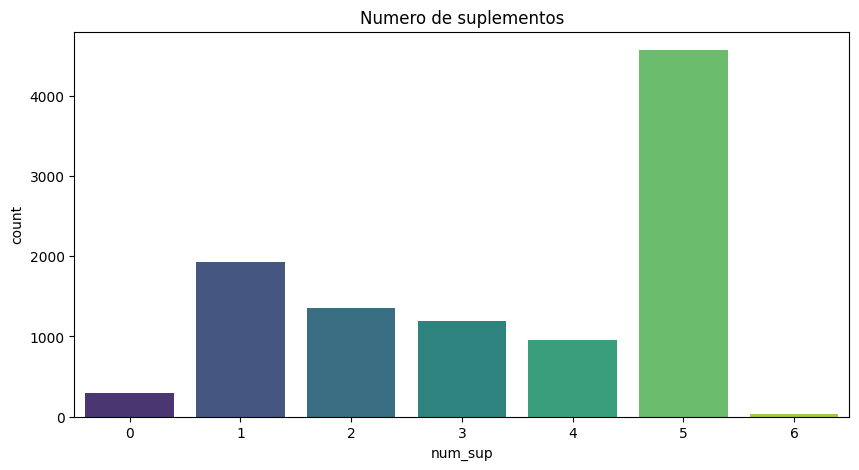

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_17204\143018703.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_dos_seg'


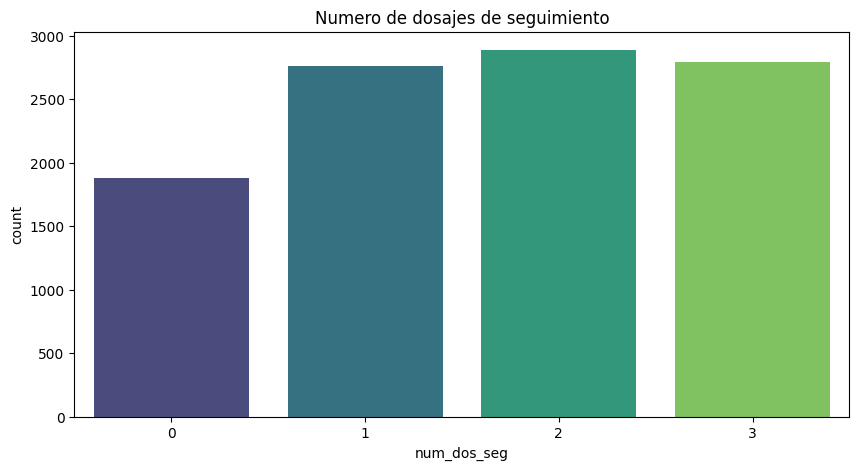

In [533]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='num_sup'
              , palette='viridis'
              , order=range(0, 7))
    
plt.title('Numero de suplementos')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='num_dos_seg'
              , palette='viridis'
              , order=range(0, 4))
plt.title('Numero de dosajes de seguimiento')
plt.show()


Limpieza de outliders en historico de dosajes, en este caso no imputaremos sino crearemos columnas que indiquen si se realizaron los dosajes.

El uso de IQR elimina la mitad de los registros. Por ello, trataremos los atipicos usando winzorised

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_17204\1260896334.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


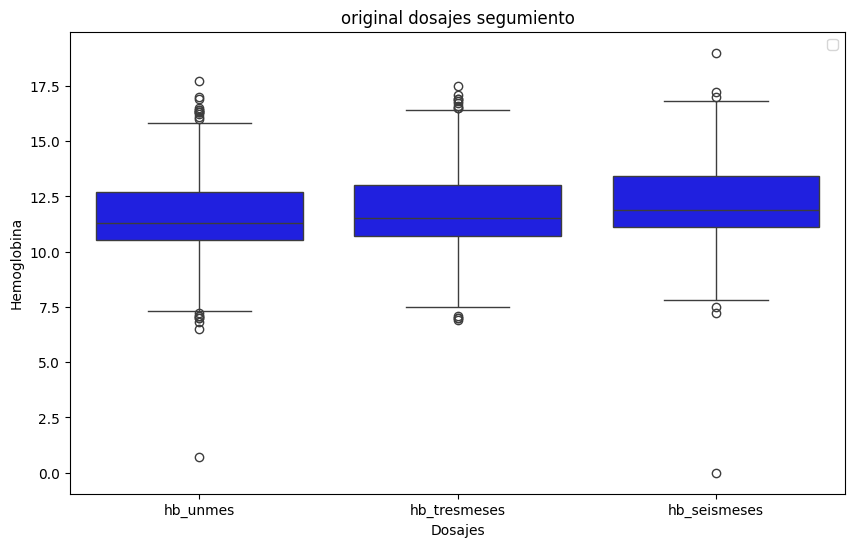

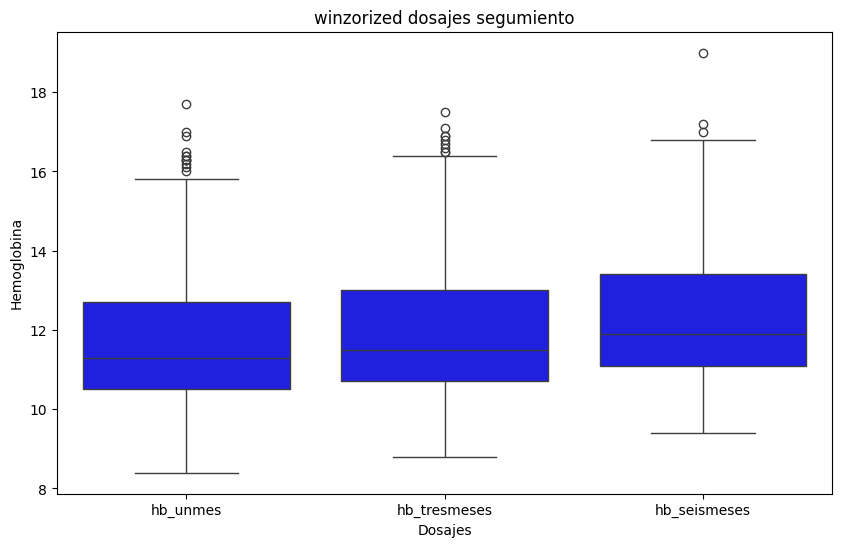

In [534]:

from scipy.stats.mstats import winsorize

aux_df = df[['hb_unmes', 'hb_tresmeses', 'hb_seismeses']]

aux_df = aux_df.apply(lambda x: winsorize(x, limits=[0.005, 0.01]), axis=0) 

plt.figure(figsize=(10, 6))
sns.boxplot(df[['hb_unmes', 'hb_tresmeses', 'hb_seismeses']], color='blue')
plt.title('original dosajes segumiento')
plt.xlabel('Dosajes')
plt.ylabel('Hemoglobina')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=aux_df, color='blue')
plt.title('winzorized dosajes segumiento')
plt.xlabel('Dosajes')
plt.ylabel('Hemoglobina')
plt.show()

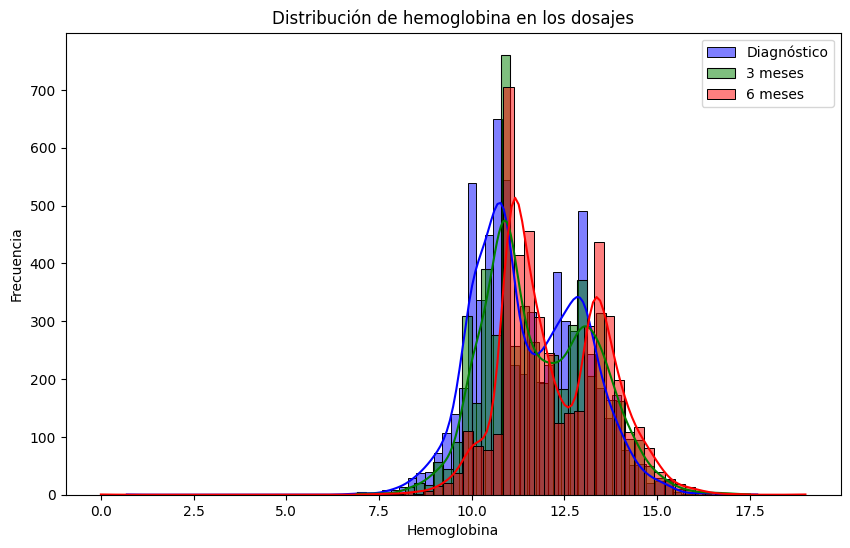

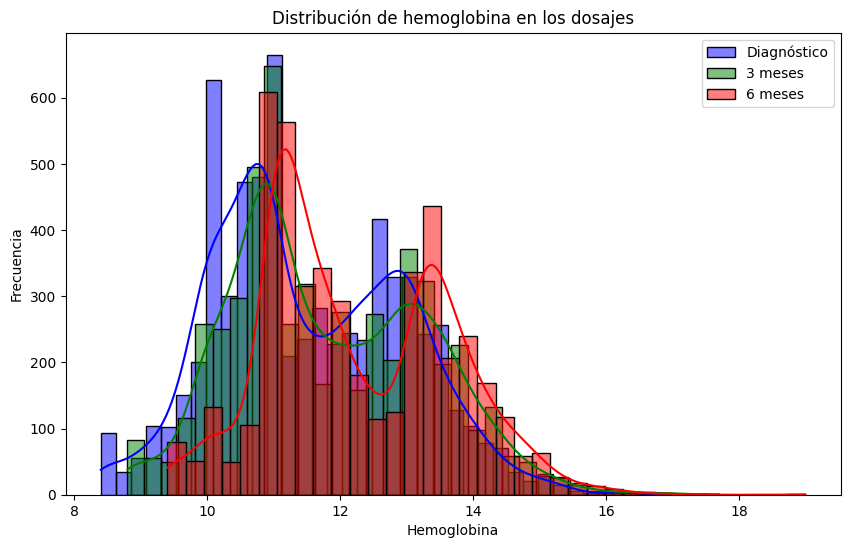

In [535]:
def show_hb_historical():
    plt.figure(figsize=(10, 6))
    sns.histplot(df['hb_unmes'], kde=True, color='blue', label='Diagnóstico') 
    sns.histplot(df['hb_tresmeses'], kde=True, color='green', label='3 meses')
    sns.histplot(df['hb_seismeses'], kde=True, color='red', label='6 meses')
    plt.title('Distribución de hemoglobina en los dosajes')
    plt.xlabel('Hemoglobina')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()


show_hb_historical()
df[['hb_unmes', 'hb_tresmeses', 'hb_seismeses']] = aux_df
show_hb_historical()

In [536]:
# crear columnas que indican si se realizo el dosaje
df['dosaje_unmes'] = df['hb_unmes'].notnull()
df['dosaje_tresmeses'] = df['hb_tresmeses'].notnull()
df['dosaje_seismeses'] = df['hb_seismeses'].notnull()


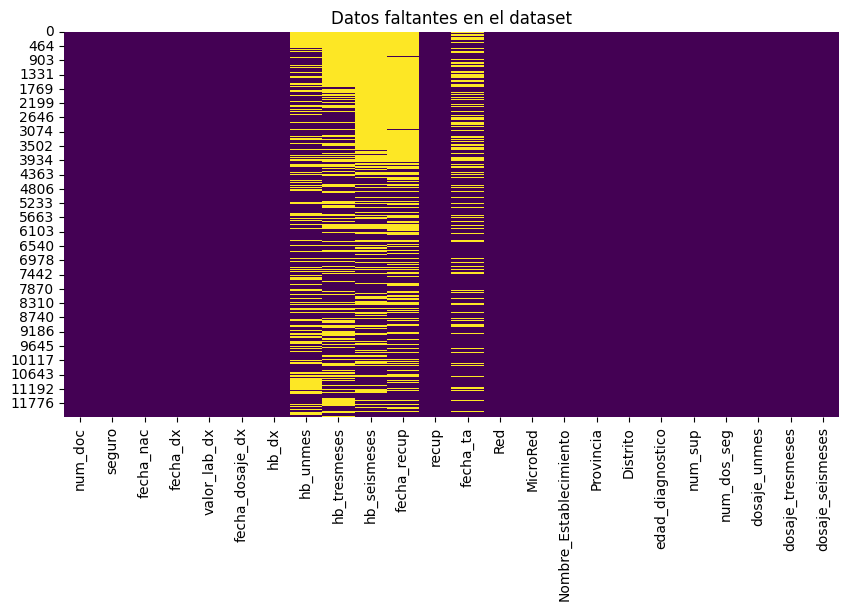

In [537]:
show_missing_data(df)

Bien, ahora nos queda limpiar los registros de cumplimiento de tratamiento y fecha de recuperacion. Estos registros contienen fechas vuya omision indica la no finalizacion del tratamiento y recuperacion.

Verificamos que el flag de recuperacion sea coherente con una fecha, y luego asignaermos una flag para el termino de tratamiento

In [538]:
print(df['recup'].value_counts())
print(f"Valores nulos en fecha_recup: {df['fecha_recup'].isnull().sum()}")

df[df['recup'] == 1]['fecha_recup'].isnull().sum()

recup
0    5552
1    4767
Name: count, dtype: int64
Valores nulos en fecha_recup: 5552


np.int64(0)

Consistente, continuamos asignando la flag de termino de tratamiento

In [539]:
df['end_trat'] = df['fecha_ta'].notnull() 

Es conveniente agregar el tiempo de recuperacion y el tiempo en tratamiento 

In [540]:
# Tiempo de recuperación
df['tiempo_recup'] = month_diff(df['fecha_recup'], df['fecha_dx']) # meses

# validar que el tiempo de recuperación sea coherente
print(f"\nPorcentaje de recuperados sin tiempo de recuperación: {len(df[['tiempo_recup', 'recup']].query('recup == 1 and tiempo_recup.isnull()')) / len(df) * 100:.2f}%")
print(f"Recuperados con tiempo de recuperacion negativo: {len(df[['tiempo_recup', 'recup']].query('recup == 1 and tiempo_recup < 0'))}")

print(f"\nNo recuperados con tiempo de recuperacion: {len(df[['tiempo_recup', 'recup']].query('recup == 0 and tiempo_recup'))}") 
print(f"No recuperados sin tiempo de recuperacion: {len(df[['tiempo_recup', 'recup']].query('recup == 0 and tiempo_recup.isnull()'))}")

print(f"\nTiempo maximo de recuperacion: {df['tiempo_recup'].max()} meses")


Porcentaje de recuperados sin tiempo de recuperación: 0.00%
Recuperados con tiempo de recuperacion negativo: 0

No recuperados con tiempo de recuperacion: 0
No recuperados sin tiempo de recuperacion: 5552

Tiempo maximo de recuperacion: 26.766666666666666 meses


In [541]:
df['tiempo_trat'] = month_diff(df['fecha_ta'], df['fecha_dx']) 

print(f'Tiempo de tratamiento negativo: {len(df.query("tiempo_trat < 0"))}')

print(f"Valores nulos en tiempo_trat: {df['tiempo_trat'].isnull().sum()}")

print(f"Tiempo maximo de tratamiento: {df['tiempo_trat'].max()} meses")


Tiempo de tratamiento negativo: 0
Valores nulos en tiempo_trat: 2455
Tiempo maximo de tratamiento: 28.3 meses


Se presume la existencia de una cifra negra de recuperacion de pacientes.

Ya sea por una de las siguientes hipotesis:
1. No retornar al servicio de salud dentro del rango [0-36].
2. Abandono del tratamiento.

En consecuencia:

1. Revisar la situacion de los infantes que superaron el rango a fecha de corte del dataset.
2. El abandono de tratamiento se divide en 3 :
    1.  Paciente aparentemente recuperado que no retorna.
    2.  Paciente aparentemente no recuperado que no retorna.
    3.  Paciente que continuo su tratamiento o seguimiento en un SS no registrado en el dataset. (HIP: privado o naturista)

In [542]:
# obtener la ultima fecha de recuperacion
f_max = df['fecha_recup'].max()

def age_in_months_from_lrec(f_n):
    y = f_max.year - f_n.dt.year
    m = f_max.month - f_n.dt.month
    d = f_max.day - f_n.dt.day
    # Convertir todo a meses
    return y * 12 + m + d / 30

# Calcular la edad en la última fecha de recuperación
df['edad_in_lrec'] = age_in_months_from_lrec(df['fecha_nac'])

print(f'El ultimo registro de recuperación es {f_max} y la fecha de publicacion del DS el 2024-07-07')
print(f'Edad maxima en de los pacientes NR y R a la última fecha de recuperación: {df["edad_in_lrec"].max():.2f} meses')


El ultimo registro de recuperación es 2024-06-22 00:00:00 y la fecha de publicacion del DS el 2024-07-07
Edad maxima en de los pacientes NR y R a la última fecha de recuperación: 35.17 meses


No hay problema de desborde por edad. Pero algunos pacientes tuvieron poco tiempo de recuperacion es posible que ello este aumentando la cantidad de no recuperados

Al respecto, del cambio de servicio medico, solo se considerar la los servicios de salud formales seria conveniente revisar la distribucion por seguro.

Asimismo, el abandono del tratamiento por otras razones constituye una falta de certeza diagnostica sobre el estado del paciente, por ello se presumira que el paciente se encuentra en el estado de no recuperado.

Empleando la normativa y consultas a especialistas, se podran definir los criterios de division poblacional, para afrontar esta cifra negra de no recuperados. 

Seguro

In [543]:
df['seguro'].value_counts().head(7)

seguro
1,        9596
2,         405
0,         206
3,          34
1, 2,       33
4,          27
2, 4,        5
Name: count, dtype: int64

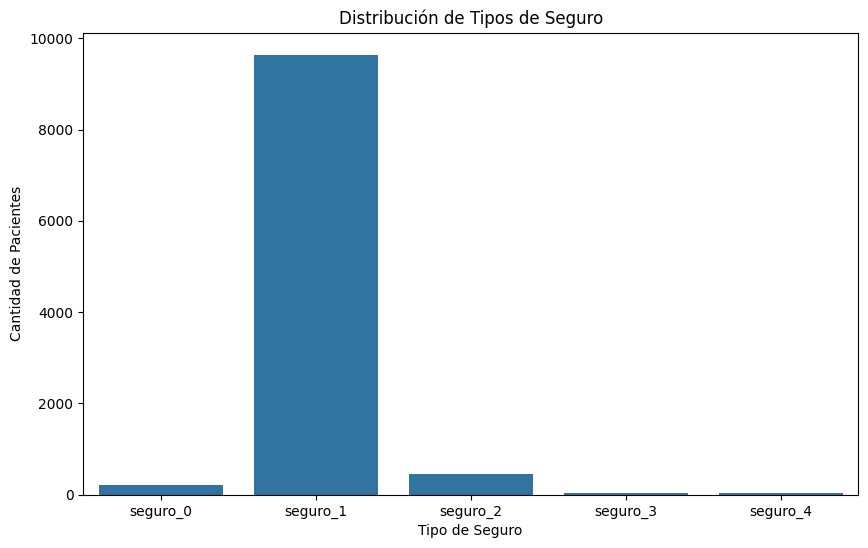

In [549]:
# Separar las combinaciones de seguros en una lista de valores
df['seguro_list'] = df['seguro'].str.split(', ')

# Crear columnas binarias para cada tipo de seguro
for seguro in ['0', '1', '2', '3', '4']:
    df[f'seguro_{seguro}'] = df['seguro_list'].apply(lambda x: int(seguro in x))

df.drop(columns=['seguro_list'], inplace=True)

df_seg_c = df[[ 'seguro_0', 'seguro_1', 'seguro_2', 'seguro_3', 'seguro_4']]

df_seg_c.head()

seg_c = df_seg_c.sum() 
seg_c = seg_c.reset_index() # convertir el indice en una columna para poder renombrar las columnas
seg_c.columns = ['Tipo de Seguro', 'Cantidad']


# Graficar la distribución de tipos de seguro
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Seguro', y='Cantidad', data=seg_c)
plt.title('Distribución de Tipos de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Cantidad de Pacientes')
plt.show()


Veamos la tasa de recuperacion segun el tipo de seguro

recup        0     1
seguro_0   106   106
seguro_1  5154  4486
seguro_2   273   173
seguro_3    26    10
seguro_4    20    18


<Figure size 1000x600 with 0 Axes>

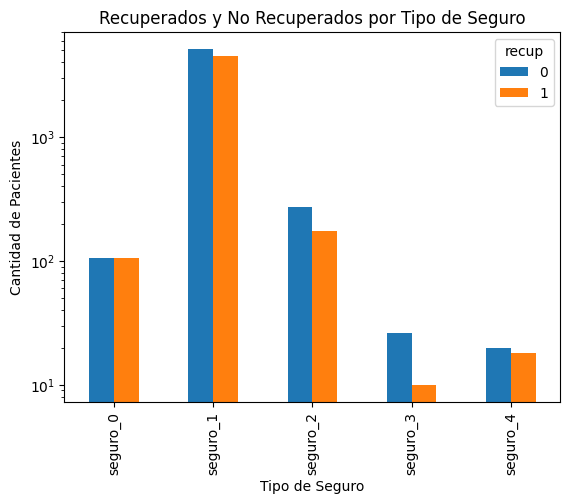

In [571]:
df_seg_c = df[[ 'seguro_0', 'seguro_1', 'seguro_2', 'seguro_3', 'seguro_4', 'recup']]

seg_c = df_seg_c.groupby(['recup']).sum()

seg_c = seg_c.T
print(seg_c)
# recuperados y no recuperados por tipo de seguro 
plt.figure(figsize=(10, 6))
seg_c.plot(kind='bar', stacked=False, logy=True)
plt.title('Recuperados y No Recuperados por Tipo de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Cantidad de Pacientes')
plt.show()

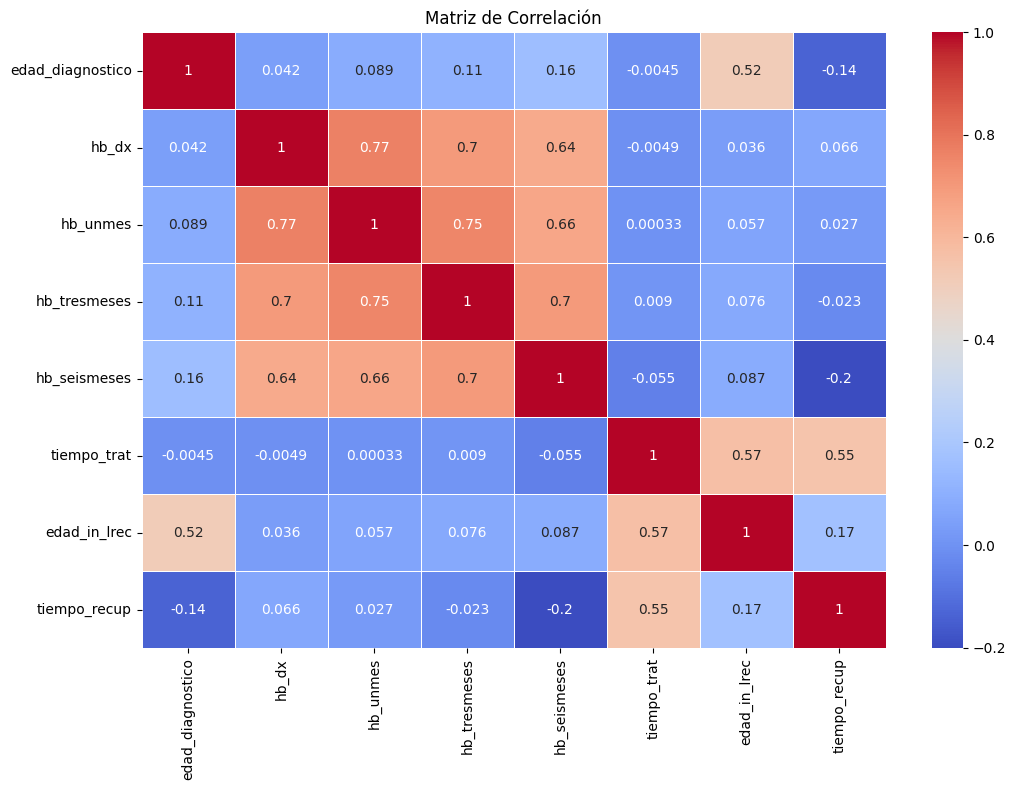

In [572]:
# Mapa de calor de la matriz de correlación
numerical_vars = ['edad_diagnostico', 'hb_dx', 'hb_unmes', 'hb_tresmeses', 'hb_seismeses', 'tiempo_trat', 'edad_in_lrec', 'tiempo_recup']

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Guardar daots limpios

Datos limpios guardados en ../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín_enriquecido.csv


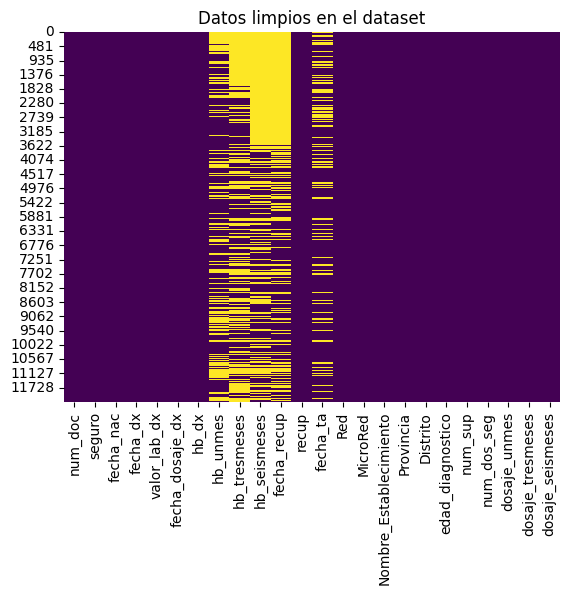

            num_doc                      fecha_nac  \
count  1.031900e+04                          10319   
mean   8.468788e+15  2022-08-02 16:37:21.147397888   
min    3.611620e+15            2021-07-17 00:00:00   
25%    8.587580e+15            2022-01-31 00:00:00   
50%    8.636100e+15            2022-07-17 00:00:00   
75%    8.687135e+15            2023-01-31 00:00:00   
max    8.832660e+15            2024-05-05 00:00:00   
std    5.699347e+14                            NaN   

                            fecha_dx                fecha_dosaje_dx  \
count                          10319                          10319   
mean   2023-08-07 14:48:21.909099776  2023-08-07 14:48:21.909099776   
min              2022-01-17 00:00:00            2022-01-17 00:00:00   
25%              2023-03-21 00:00:00            2023-03-21 00:00:00   
50%              2023-09-05 00:00:00            2023-09-05 00:00:00   
75%              2024-01-23 00:00:00            2024-01-23 00:00:00   
max             

In [508]:
# Guardar el dataset limpio
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Datos limpios en el dataset')
df.to_csv('../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín_enriquecido.csv', index=False)
print("Datos limpios guardados en ../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín_enriquecido.csv")
plt.show()
print(df.describe())
print("El dataset se redujo en un {0:.2f}%".format((n_original - df.shape[0]) / n_original * 100))
